In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import data and make a copy of data
data = pd.read_csv("SAT__College_Board__2010_School_Level_Results_20240506.csv")
df = data.copy()
df.head()

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
4,01M509,CMSP HIGH SCHOOL,NaN,NaN,NaN,NaN


In [3]:
# Information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DBN                    460 non-null    object 
 1   School Name            460 non-null    object 
 2   Number of Test Takers  386 non-null    float64
 3   Critical Reading Mean  386 non-null    float64
 4   Mathematics Mean       386 non-null    float64
 5   Writing Mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.7+ KB


From information data we know that data has Nan cell

In [4]:
# Deleted all row that have Nan cell
df = df.dropna()
df

,DBN,School Name,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
0,01M292,Henry Street School for International Studies,31.0,391.0,425.0,385.0
1,01M448,University Neighborhood High School,60.0,394.0,419.0,387.0
2,01M450,East Side Community High School,69.0,418.0,431.0,402.0
3,01M458,SATELLITE ACADEMY FORSYTH ST,26.0,385.0,370.0,378.0
5,01M515,Lower East Side Preparatory High School,154.0,314.0,532.0,314.0
...,...,...,...,...,...,...
448,32K554,ALL CITY LEADERSHIP SECONDARY,29.0,394.0,420.0,395.0
449,32K556,Bushwick Leaders High School for Academic Excel,30.0,357.0,345.0,351.0
455,75R025,South Richmond High School,10.0,407.0,421.0,400.0
458,76K460,John Jay High School,9.0,390.0,381.0,398.0


In [5]:
# Check again information of data after cleaned Nan Cell
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 386 entries, 0 to 459
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DBN                    386 non-null    object 
 1   School Name            386 non-null    object 
 2   Number of Test Takers  386 non-null    float64
 3   Critical Reading Mean  386 non-null    float64
 4   Mathematics Mean       386 non-null    float64
 5   Writing Mean           386 non-null    float64
dtypes: float64(4), object(2)
memory usage: 21.1+ KB


From information of data we know that no more Nan cell

In [6]:
# Viewing the summary of descriptive statistics from the numerical columns
data.describe()

,Number of Test Takers,Critical Reading Mean,Mathematics Mean,Writing Mean
count,386.000000,386.000000,386.000000,386.000000
mean,103.658031,404.248705,412.935233,397.689119
std,145.264496,56.815631,64.990976,57.762584
min,7.000000,291.000000,281.000000,285.000000
25%,35.000000,370.000000,372.000000,364.000000
50%,54.000000,392.500000,394.500000,383.000000
75%,92.750000,419.000000,429.750000,414.000000
max,1047.000000,674.000000,735.000000,678.000000


In [7]:
# Calculate correlation matrix
correlation_matrix = data[['Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']].corr()
correlation_matrix

,Critical Reading Mean,Mathematics Mean,Writing Mean
Critical Reading Mean,1.000000,0.894079,0.978404
Mathematics Mean,0.894079,1.000000,0.902777
Writing Mean,0.978404,0.902777,1.000000


The correlation matrix shows the following results:

1. Strong correlation between Critical Reading Mean and Mathematics Mean
3. Very strong correlation between Critical Reading Mean and Writing Mea
4. Very strong correlation between Mathematics Mean and Writing Mean

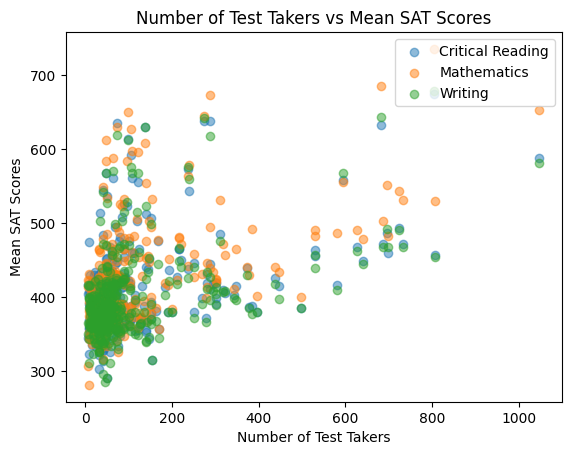

In [8]:
# Displaying the Mean SAT Scores based on the number of test takers
plt.scatter(data['Number of Test Takers'], data['Critical Reading Mean'], alpha=0.5, label='Critical Reading')
plt.scatter(data['Number of Test Takers'], data['Mathematics Mean'], alpha=0.5, label='Mathematics')
plt.scatter(data['Number of Test Takers'], data['Writing Mean'], alpha=0.5, label='Writing')
plt.xlabel('Number of Test Takers')
plt.ylabel('Mean SAT Scores')
plt.legend(loc='upper right')
plt.title('Number of Test Takers vs Mean SAT Scores')
plt.show()

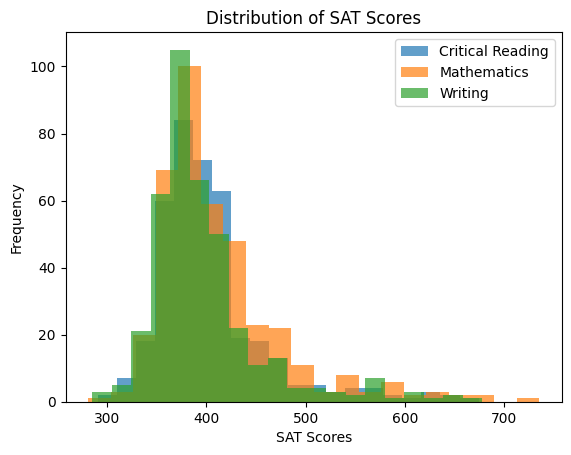

In [9]:
#Viewing the distribution of the average scores in Critical Reading, Mathematics, and Writing
plt.hist(data['Critical Reading Mean'], bins=20, alpha=0.7, label='Critical Reading')
plt.hist(data['Mathematics Mean'], bins=20, alpha=0.7, label='Mathematics')
plt.hist(data['Writing Mean'], bins=20, alpha=0.7, label='Writing')
plt.xlabel('SAT Scores')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Distribution of SAT Scores')
plt.show()

In [10]:
# Obtaining the 10 schools with the highest Critical Reading Mean scores
top_schools_critical_mean = data[['School Name', 'Critical Reading Mean']].sort_values(by='Critical Reading Mean', ascending=False).head(10)

# Obtaining the 10 schools with the lowest Critical Reading Mean scores
bottom_schools_critical_mean = data[['School Name', 'Critical Reading Mean']].sort_values(by='Critical Reading Mean').head(10)

# Displaying the 10 schools with the highest Critical Reading Mean scores
print("Top 10 Schools by Critical Reading Mean:")
print(top_schools_critical_mean.to_string(index=False))

# Displaying the 10 schools with the lowest Critical Reading Mean scores
print("\nBottom 10 Schools by Critical Reading Mean:")
print(bottom_schools_critical_mean.to_string(index=False))

Top 10 Schools by Critical Reading Mean:
                                        School Name  Critical Reading Mean
                            STUYVESANT HIGH SCHOOL                   674.0
               STATEN ISLAND TECHNICAL HIGH SCHOOL                   638.0
     Townsend Harris High School at Queens College                   637.0
          HS of American Studies at Lehman College                   635.0
                      BRONX HIGH SCHOOL OF SCIENCE                   632.0
                    BARD HIGH SCHOOL EARLY COLLEGE                   630.0
                    QUEENS HS FOR SCIENCE YORK COL                   613.0
High School For Math Science Engineering City Coll                   592.0
                    BROOKLYN TECHNICAL HIGH SCHOOL                   588.0
                                     BEACON SCHOOL                   573.0

Bottom 10 Schools by Critical Reading Mean:
                                    School Name  Critical Reading Mean
                 H

In [11]:
# Obtaining the 10 schools with the highest Mathematics Mean scores
top_schools_critical_mean = data[['School Name', 'Mathematics Mean']].sort_values(by='Mathematics Mean', ascending=False).head(10)

# Obtaining the 10 schools with the lowest Mathematics Mean scores
bottom_schools_critical_mean = data[['School Name', 'Mathematics Mean']].sort_values(by='Mathematics Mean').head(10)

# Displaying the 10 schools with the highest Mathematics Mean scores
print("Top 10 Schools by Mathematics Mean:")
print(top_schools_critical_mean.to_string(index=False))

# Displaying the 10 schools with the lowest Mathematics Mean scores
print("\nBottom 10 Schools by Mathematics Mean:")
print(bottom_schools_critical_mean.to_string(index=False))

Top 10 Schools by Mathematics Mean:
                                        School Name  Mathematics Mean
                            STUYVESANT HIGH SCHOOL              735.0
                      BRONX HIGH SCHOOL OF SCIENCE              685.0
               STATEN ISLAND TECHNICAL HIGH SCHOOL              673.0
                    BROOKLYN TECHNICAL HIGH SCHOOL              652.0
                    QUEENS HS FOR SCIENCE YORK COL              650.0
     Townsend Harris High School at Queens College              644.0
          HS of American Studies at Lehman College              630.0
High School For Math Science Engineering City Coll              627.0
       Dual Language and Asian Studies High School              612.0
                    BARD HIGH SCHOOL EARLY COLLEGE              608.0

Bottom 10 Schools by Mathematics Mean:
                                    School Name  Mathematics Mean
Brooklyn High Sch for Leadership Community Svc              281.0
                    EV

In [12]:
# Obtaining the 10 schools with the highest Writing Mean scores
top_schools_critical_mean = data[['School Name', 'Writing Mean']].sort_values(by='Writing Mean', ascending=False).head(10)

# Obtaining the 10 schools with the lowest Writing Mean scores
bottom_schools_critical_mean = data[['School Name', 'Writing Mean']].sort_values(by='Writing Mean').head(10)

# Displaying the 10 schools with the highest Writing Mean scores
print("Top 10 Schools by Writing Mean:")
print(top_schools_critical_mean.to_string(index=False))

# Displaying the 10 schools with the lowest Writing Mean scores
print("\nBottom 10 Schools by Writing Mean:")
print(bottom_schools_critical_mean.to_string(index=False))

Top 10 Schools by Writing Mean:
                                        School Name  Writing Mean
                            STUYVESANT HIGH SCHOOL          678.0
                      BRONX HIGH SCHOOL OF SCIENCE          643.0
     Townsend Harris High School at Queens College          642.0
                    BARD HIGH SCHOOL EARLY COLLEGE          630.0
          HS of American Studies at Lehman College          619.0
               STATEN ISLAND TECHNICAL HIGH SCHOOL          617.0
                    QUEENS HS FOR SCIENCE YORK COL          612.0
                    BROOKLYN TECHNICAL HIGH SCHOOL          581.0
High School For Math Science Engineering City Coll          575.0
                                     BEACON SCHOOL          575.0

Bottom 10 Schools by Writing Mean:
                                    School Name  Writing Mean
          International School of Liberal Arts          285.0
                 HIGH SCHOOL OF WORLD CULTURES          291.0
         Kingsbridge

In [13]:
# Calculating the average of the three SAT scores for each school
data['Total Mean'] = data[['Critical Reading Mean', 'Mathematics Mean', 'Writing Mean']].mean(axis=1)

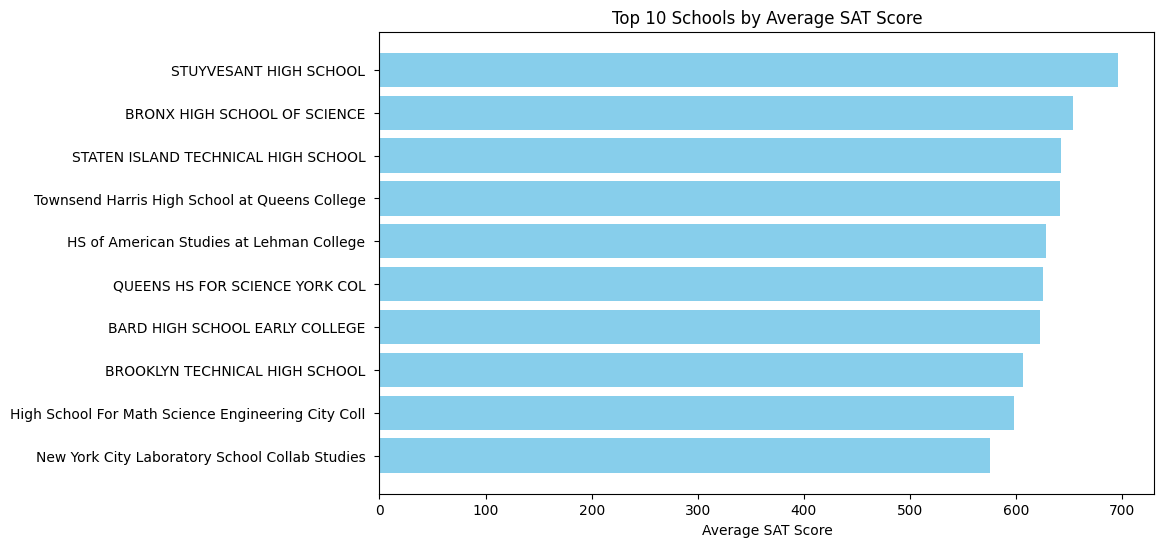

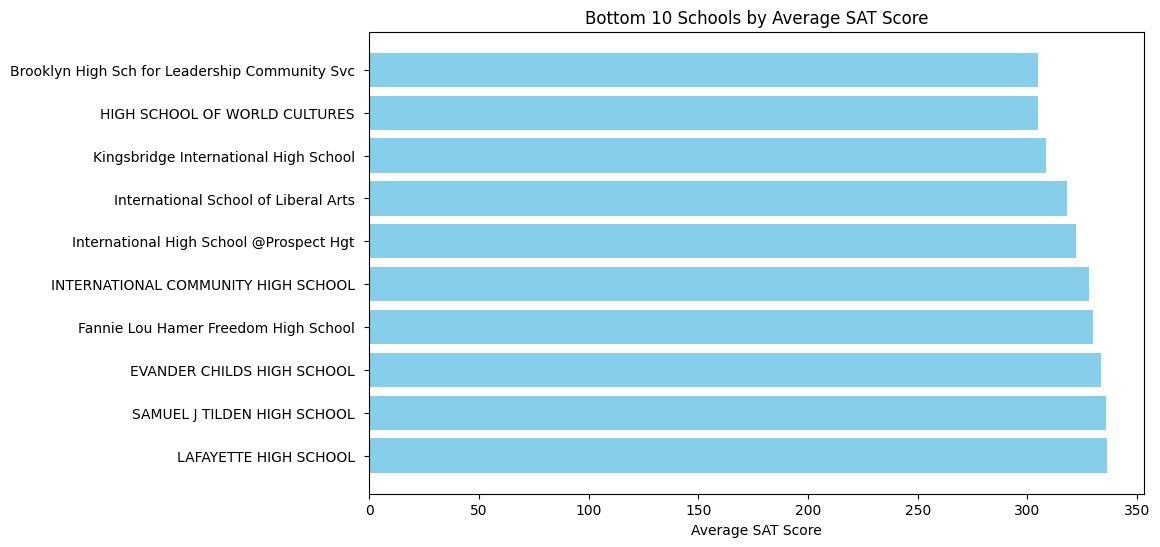

In [14]:
# Obtaining the 10 schools with the highest average scores
top_schools = data[['School Name', 'Total Mean']].sort_values(by='Total Mean', ascending=False).head(10)

# Obtaining the 10 schools with the lowest average scores
bottom_schools = data[['School Name', 'Total Mean']].sort_values(by='Total Mean').head(10)

# Function to create a bar chart
def plot_school_scores(schools, title):
    plt.figure(figsize=(10, 6))
    plt.barh(schools['School Name'], schools['Total Mean'], color='skyblue')
    plt.xlabel('Average SAT Score')
    plt.title(title)
    plt.gca().invert_yaxis()  # Membalik sumbu y agar sekolah dengan nilai tertinggi di atas
    plt.show()

# Plot for the 10 schools with the highest average scores
plot_school_scores(top_schools, 'Top 10 Schools by Average SAT Score')

# Plot for the 10 schools with the lowst average scores
plot_school_scores(bottom_schools, 'Bottom 10 Schools by Average SAT Score')